# Fashion Mnist

On this notebook we will create a classifier on the fashion mnist dataset. This dataset consists on 28x28 images of 10 different clothes. We will take a look at the dataset and create the classifier.

In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


## The Dataset

As we stated above, the Fashion MNIST is a fashion dataset, and its resolution is the same as in the classic MNIST, but we wanted to work on a slightly more complicated task. We have a precreated training and testing dataset: 60000 and 10000 images, and it can be loaded stright from tf

In [32]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

As in the MNIST, each instance is an array, and the classes are 0-9 mapped to single ids:

In [33]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Data Exploration

Let's check some factos about the data:

In [34]:
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [35]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Pre-procese el set de datos

El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

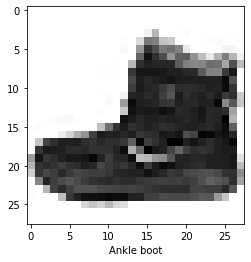

In [36]:
def plot_image(image, label):    
    plt.imshow(image, cmap = plt.cm.binary)
    plt.xlabel(class_names[label])
    plt.grid(False)
plot_image(train_images[0], train_labels[0])
plt.show()

<font color=red><b> Plot some examples in the dataset
</font>

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    ...
plt.show()

## Model Architecture

Let's build a model and train it on the dataset. Our model will consist on:
- A flattening layer
- A relu activated, dense layer with 128 units
- The final layer with the number of categories as the number of units, softmax-activated.
- Adam will be its optimizer
- Use sparse categorical crossentropy as the loss function
- Add accuracy to the compilation metrics

<font color=red><b>Create the moodel and compile it
<br>Hint: use the imported functions </b>
</font>

In [14]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model =...


## Model training

<font color=red><b>Train the model for 10 epochs. Do we need some preprocessing first?
</font>

In [ ]:
...

### Model accuracy
<font color=red><b>Evaluate the model accuracy
</font>

In [ ]:
test_loss, test_acc = ...

print('\nTest accuracy:', test_acc)

What happened?

<font color=red><b> Discuss how can we solve it and do it
</font>

In [ ]:
...

## Model Predictions

Let's check the model predictions

In [49]:
predictions = model.predict(test_images)
print('logits: ', predictions[0])
print('top class: ', np.argmax(predictions[0]), 'class name: ', class_names[np.argmax(predictions[0])])

logits:  [6.47870813e-10 4.40177700e-10 2.19062219e-14 4.70574746e-10
 1.46880582e-13 4.33264021e-03 1.08859545e-11 6.59757154e-03
 2.13626592e-08 9.89069760e-01]
top class:  9 class name:  Ankle boot


We are going to build a visualizatin way to show both the image, its prediction, its actual class and a graph of the probabilities. 

<font color=red><b> Complete the functions for plotting both
</font>

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    # show the actual image
    ...
    # get the label
    predicted_label = ...
    # plot label in blue if it is a match and in red otherwise
    color = ...

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    # This will plot the histogram of probabilities
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    # get the predicted label
    predicted_label = ....
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

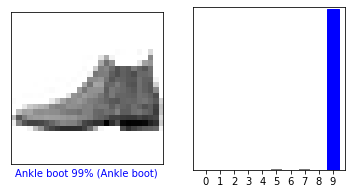

In [53]:
def show_results(i):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
show_results(0)
plt.show()

<font color=red><b> Plot some examples. Find a misclassified example and discuss the probabilities
</font>

In [ ]:
...

<font color=red><b> Plot the first X test images, their predicted labels, and the true labels.
</font>

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    ...
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    ...
plt.tight_layout()
plt.show()

#### Single image prediction

<font color=red><b> Just try it. What happens?. How can we fix it?
</font>

In [ ]:
...

<font color=red><b> PLot the class probabilities. Add the class names.
<br> Hint: use the xticks function </b>
</font>

In [ ]:
...